In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [13]:
import pandas as pd
from pandas import DataFrame

# Yalnızca bir kere patch et
if not hasattr(DataFrame, "_orig_repr_html_"):
    DataFrame._orig_repr_html_ = DataFrame._repr_html_

    def _scrollable_repr_html(self):
        html = DataFrame._orig_repr_html_(self)  # sınıftaki orijinale sabitle
        return (
            '<div style="width:100%; height:400px; overflow:auto; '
            'border:1px solid #eee; border-radius:8px; padding:8px;">'
            f'{html}</div>'
        )

    DataFrame._repr_html_ = _scrollable_repr_html

In [9]:
df = pd.read_csv(r"2_siparis_data_merged_22_07 (1).csv")

C:\Users\Asus\AppData\Local\Temp\ipykernel_30828\519258227.py:1: DtypeWarning: Columns (20,28,29,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"2_siparis_data_merged_22_07 (1).csv")


In [5]:
df

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi
0,5000,1002763582,2018-06-30,6,03:06:52 PM,OTOB,BS,OY,50,800000,AKYÜZLER OTOMOTİV DIŞ,LF16519,YAĞ FİLTRESİ,LF16015VE,1,10.0,2.0,2.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,AVENUE E6,CUMMINS,B,0,I,0,NaN,1.107911e+09
1,5000,1002763573,2018-06-30,6,11:59:12 AM,OTOB,BS,OY,350,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,5572-LGE-01Y,"GELİŞTİRİLMİŞ TİP AKÜ 225Ah, TEMSA LOGO",NaN,0,10.0,1.0,1.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,SAFARI-HD,İNCİ AKÜ,T,0,Y,0,NaN,1.107911e+09
2,5000,1002763574,2018-06-30,6,12:19:33 PM,OTOB,BS,OY,10,600241,BOLU AS OTOMOTİV TUR. NAK.,MX902755,"KELEPÇE, INTERCOOLER",NaN,0,10.0,6.0,1.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,PRESTIJ E6,MFTBC,V,0,I,0,NaN,1.107911e+09
3,5000,1002763575,2018-06-30,6,12:21:33 PM,OTOB,BS,OY,10,600241,BOLU AS OTOMOTİV TUR. NAK.,TM187142Y,HAVA KOMPRESORU,NaN,0,10.0,2.0,0.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,PRESTIJ E6,FILKAR,K,0,Y,0,NaN,1.107911e+09
4,5000,1002763576,2018-06-30,6,12:23:54 PM,OTOB,BS,OY,10,600030,BAYRAKTAR OTOMOTİV TİC VE SAN.LTD.,5668-LGP-01,"ARKA BLOK FAR,SAG,DG2010-8B,YENI",HD253129,1,10.0,1.0,1.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,MARATON,DANYANG,P,0,I,0,NaN,1.107911e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396495,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,440,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,ML239124Y,"E6 PRESTIJ FILTRE,YAKIT",NaN,0,1.0,50.0,50.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,50.0,YPSP,40,NaN,PRESTIJ E6,KRON FİLT,I,0,Y,0,NaN,NaN
396496,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,430,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,MK580528AY,"LAMBA KOMPLE,DONUS SINYALI,ON,SAG",NaN,0,1.0,10.0,10.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,10.0,YPSP,40,NaN,FEB91E,ÇITAK,M,0,Y,0,NaN,NaN
396497,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,420,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,MK580527AY,"FAR COMPLESI,DONUS SINYALI,ON,SOL",NaN,0,1.0,10.0,10.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,10.0,YPSP,40,NaN,FEB91E,ÇITAK,M,0,Y,0,NaN,NaN
396498,4000,1108064087,2025-06-30,6,13:50:49,MA00,YS,PY,490,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,5802114243,SILINDIR KAPAGI-E6,NaN,0,1.0,2.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,CANTER S-E,FPT,H,0,I,0,NaN,NaN


In [10]:
teklif_kodları = ["TKLF", "MTEK", "PBLT", "PTBE", "PTEK", "STEK", "VTEK", "WKAM", "WPAK", "WTEK", "ZTKL","IADE"]
df = df[(~ df["Satış belgesi türü"].isin(teklif_kodları))]



In [12]:
df["Satış belgesi türü"].value_counts()

Satış belgesi türü
YPSP    160286
YPAS      9741
ZBED       374
YPDS         5
Name: count, dtype: int64

In [3]:
df_envanter = pd.read_excel(r"Partvision Envanter 14.08.25 1.xlsx")

In [14]:
df["Yaratma tarihi"]=pd.to_datetime(df["Yaratma tarihi"])
df["Yaratma tarihi"].info()

<class 'pandas.core.series.Series'>
Index: 170406 entries, 38664 to 396499
Series name: Yaratma tarihi
Non-Null Count   Dtype         
--------------   -----         
170406 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.6 MB


In [17]:
df

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi
38664,4000,1107921029,2019-01-03,1,17:44:36,MA00,YS,PY,10,600441,TUFANLAR OTOMOTİV SANAYİ VE TİCARET,ML254445,"HORTUM,KALORİFER BOR",NaN,0,1.0,2.0,2.0,Normal,2019-01-04 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,0.0,2019-04-17,NaN,00:00:00,0.0,YPSP,901,NaN,CANTER S-E,MFTBC,V,0,I,0,NaN,NaN
38665,4000,1107921026,2019-01-03,1,17:18:35,MA00,YS,PY,10,600012,ALDATMAZ MOTORLU ARAÇLAR SAN. VE,MB097826Y,"KAPAK,AKU,UST",NaN,0,1.0,10.0,10.0,Normal,2019-01-04 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,0.0,2019-02-01,NaN,00:00:00,0.0,YPSP,901,NaN,CANTER5/6,BALAPTEKS,P,0,Y,0,NaN,NaN
38666,4000,1107921019,2019-01-03,1,15:54:22,MA00,YS,PY,10,600020,AS-KALE OTOMOTİV SAN. VE TİC. LTD.Ş,MB097826Y,"KAPAK,AKU,UST",NaN,0,1.0,1.0,1.0,Normal,2019-01-03 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,0.0,2019-02-01,NaN,00:00:00,0.0,YPSP,901,NaN,CANTER5/6,BALAPTEKS,P,0,Y,0,NaN,NaN
38667,4000,1107921015,2019-01-03,1,15:47:05,MA00,YS,PY,10,600012,ALDATMAZ MOTORLU ARAÇLAR SAN. VE,MB097826Y,"KAPAK,AKU,UST",NaN,0,1.0,6.0,6.0,Normal,2019-01-03 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,0.0,2019-02-01,NaN,00:00:00,0.0,YPSP,901,NaN,CANTER5/6,BALAPTEKS,P,0,Y,0,NaN,NaN
38668,4000,1107921005,2019-01-03,1,15:08:48,MA00,YS,PY,20,600441,TUFANLAR OTOMOTİV SANAYİ VE TİCARET,MK667394,"CONTA,SU POMPASI",NaN,0,1.0,1.0,1.0,Normal,2019-01-03 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,1.0,2019-01-22,2019-01-22,09:54:11,1.0,YPSP,900,NaN,PRESTIJ E6,MFTBC,X,0,I,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396495,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,440,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,ML239124Y,"E6 PRESTIJ FILTRE,YAKIT",NaN,0,1.0,50.0,50.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,50.0,YPSP,40,NaN,PRESTIJ E6,KRON FİLT,I,0,Y,0,NaN,NaN
396496,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,430,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,MK580528AY,"LAMBA KOMPLE,DONUS SINYALI,ON,SAG",NaN,0,1.0,10.0,10.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,10.0,YPSP,40,NaN,FEB91E,ÇITAK,M,0,Y,0,NaN,NaN
396497,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,420,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,MK580527AY,"FAR COMPLESI,DONUS SINYALI,ON,SOL",NaN,0,1.0,10.0,10.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,10.0,YPSP,40,NaN,FEB91E,ÇITAK,M,0,Y,0,NaN,NaN
396498,4000,1108064087,2025-06-30,6,13:50:49,MA00,YS,PY,490,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,5802114243,SILINDIR KAPAGI-E6,NaN,0,1.0,2.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,CANTER S-E,FPT,H,0,I,0,NaN,NaN


C:\Users\Asus\AppData\Local\Temp\ipykernel_30828\2542852085.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby([pd.Grouper(key="Yaratma tarihi", freq="M"), "Malzeme"])["Sipariş miktarı"].sum().reset_index()


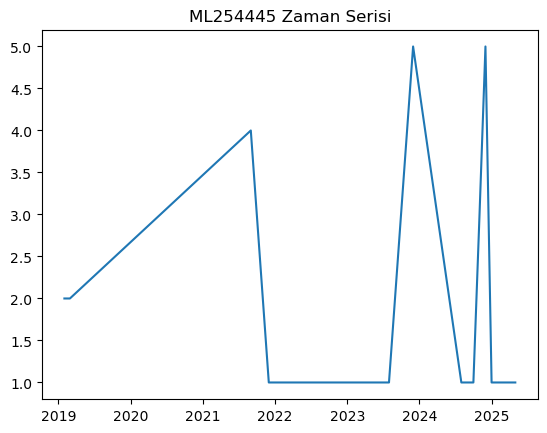

In [20]:
df_monthly = df.groupby([pd.Grouper(key="Yaratma tarihi", freq="M"), "Malzeme"])["Sipariş miktarı"].sum().reset_index()

# Örnek malzeme için plot
malzeme = "ML254445"
df_plot = df_monthly[df_monthly["Malzeme"] == malzeme]
plt.plot(df_plot["Yaratma tarihi"], df_plot["Sipariş miktarı"])
plt.title(f"{malzeme} Zaman Serisi")
plt.show()

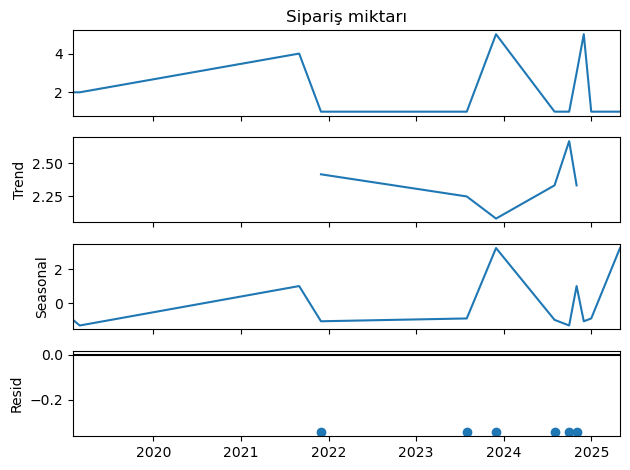

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_malzeme = df_monthly[df_monthly["Malzeme"]=="ML254445"].set_index("Yaratma tarihi")
result = seasonal_decompose(df_malzeme["Sipariş miktarı"], model="additive", period=6)
result.plot()
plt.show()


03:30:08 - cmdstanpy - INFO - Chain [1] start processing
03:30:08 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


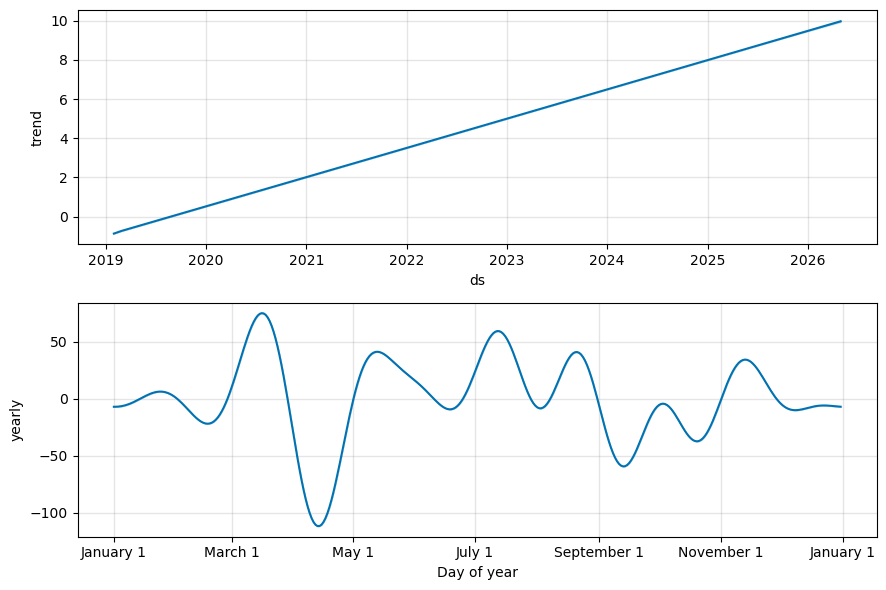

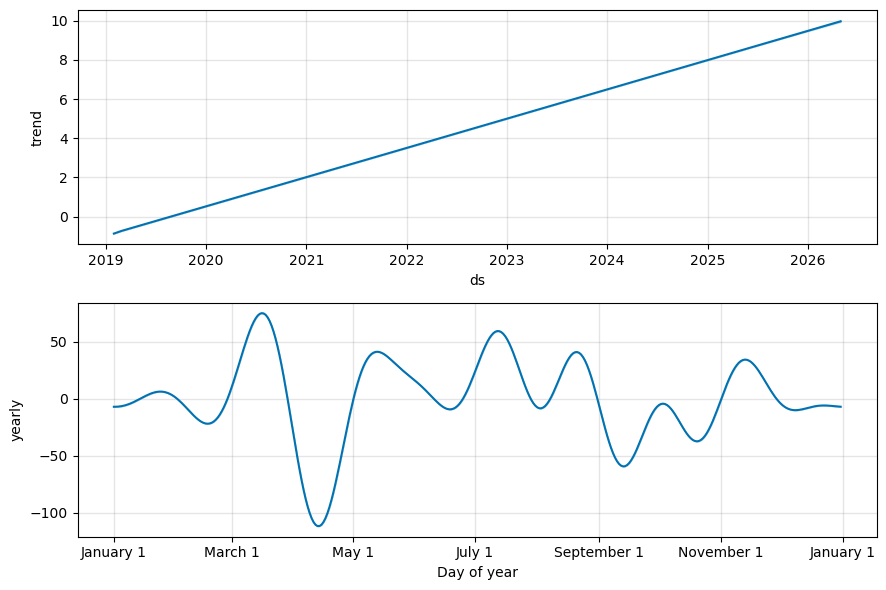

In [24]:
from prophet import Prophet

df_prophet = df_monthly[df_monthly["Malzeme"]=="ML254445"][["Yaratma tarihi","Sipariş miktarı"]].rename(columns={"Yaratma tarihi":"ds","Sipariş miktarı":"y"})
m = Prophet(yearly_seasonality=True)
m.fit(df_prophet)
future = m.make_future_dataframe(periods=12, freq="M")
forecast = m.predict(future)

m.plot_components(forecast)  # burada yıl içi mevsimsellik net görünür


In [47]:
a=df.groupby("Malzeme")


In [80]:
df_yaygın=pd.read_csv("son3_yaygin.txt_2")
df_yaygın = df_yaygın.rename(columns={"P608668": "Malzeme"})
df_yaygın

,Malzeme
0,TY260313Y
1,ML242294Y
2,R120P
3,9206-03Y
4,SB150232Y
...,...
4280,FWK.521000.AA
4281,G06-02-004Y
4282,H601/4
4283,H68.210820


In [81]:
df_yaygın_merged = pd.merge(df, df_yaygın, on="Malzeme", how="inner")
df_yaygın_merged

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi
0,4000,1107921005,2019-01-03,1,15:08:48,MA00,YS,PY,20,600441,TUFANLAR OTOMOTİV SANAYİ VE TİCARET,MK667394,"CONTA,SU POMPASI",NaN,0,1.0,1.0,1.0,Normal,2019-01-03 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,1.0,2019-01-22,2019-01-22,09:54:11,1.0,YPSP,900,NaN,PRESTIJ E6,MFTBC,X,0,I,0,NaN,NaN
1,4000,1107921188,2019-01-07,1,11:21:32,MA00,YS,PY,20,600089,ÖZÇELİK ÜÇ KARDEŞLER OTOMOTİV,MB025153Y,TAKOZ,NaN,0,1.0,20.0,20.0,Normal,2019-01-07 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,0.0,2019-02-05,NaN,00:00:00,0.0,YPSP,901,NaN,PRESTIJ E2,YEMENİCİ,P,0,Y,0,NaN,NaN
2,4000,1107921192,2019-01-07,1,11:56:42,MA00,YS,PY,10,600042,ÇİZGİ OTOMOTİV İNŞAAT SAN.VE TİC.LT,FE802165Y,"STOP LAMBASI,ARKA",NaN,0,1.0,4.0,4.0,Normal,2019-01-07 00:00:00,2019-01-07,11:56:42,6.2018,6.2025,0,1.0,1.0,1.0,2019-01-07,2019-01-07,11:56:42,4.0,YPSP,901,NaN,CANTER S-E,FARBA,K,0,Y,0,NaN,NaN
3,4000,1107921213,2019-01-07,1,14:03:42,MA00,YS,PY,10,600571,BAYRAM ALİ TÜRKYILMAZ,FE259110Y,YEDEK LASTIK TASIYICI MEKANIZMASI FE85,NaN,0,1.0,2.0,2.0,Normal,2019-01-07 00:00:00,2019-01-07,14:03:42,6.2018,6.2025,0,0.0,0.0,0.0,2019-03-29,2019-01-07,14:03:42,0.0,YPSP,901,NaN,CANTERORT,MAKERSAN,P,0,Y,0,NaN,NaN
4,4000,1107921231,2019-01-07,1,15:40:53,MA00,YS,PY,10,600012,ALDATMAZ MOTORLU ARAÇLAR SAN. VE,ME130968,"YAĞ FİLTRESİ, İŞ MAK",NaN,0,1.0,59.0,59.0,Normal,2019-01-07 00:00:00,2019-01-07,15:40:53,6.2018,6.2025,0,0.0,0.0,0.0,2019-03-21,2019-01-07,15:40:53,0.0,YPSP,901,NaN,FH215,MFTBC,P,0,I,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51234,4000,1108064087,2025-06-30,6,13:50:48,MA00,YS,PY,480,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,ME418337Y,"KAVRAMA,FAN",NaN,0,1.0,3.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,PRESTIJ E5,ÇITAK,H,0,Y,0,NaN,NaN
51235,4000,1108064087,2025-06-30,6,13:50:48,MA00,YS,PY,470,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,5801763775,"FREN,EGZOZ",NaN,0,1.0,2.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,CANTER S-E,FPT,H,0,I,0,NaN,NaN
51236,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,450,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,ML242294Y,"FILTRE,HAVA",NaN,0,1.0,50.0,50.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,50.0,YPSP,40,NaN,PRESTIJ E6,KRON FİLT,I,0,Y,0,NaN,NaN
51237,4000,1108064087,2025-06-30,6,13:50:49,MA00,YS,PY,490,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,5802114243,SILINDIR KAPAGI-E6,NaN,0,1.0,2.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,CANTER S-E,FPT,H,0,I,0,NaN,NaN


In [82]:
df_yaygın_merged["Yaratma tarihi"]=pd.to_datetime(df_yaygın_merged["Yaratma tarihi"])
df_yaygın_merged["Yaratma tarihi"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51239 entries, 0 to 51238
Series name: Yaratma tarihi
Non-Null Count  Dtype         
--------------  -----         
51239 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 400.4 KB


In [293]:
df=df_yaygın_merged
df

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi
0,4000,1107921005,2019-01-03,1,15:08:48,MA00,YS,PY,20,600441,TUFANLAR OTOMOTİV SANAYİ VE TİCARET,MK667394,"CONTA,SU POMPASI",NaN,0,1.0,1.0,1.0,Normal,2019-01-03 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,1.0,2019-01-22,2019-01-22,09:54:11,1.0,YPSP,900,NaN,PRESTIJ E6,MFTBC,X,0,I,0,NaN,NaN
1,4000,1107921188,2019-01-07,1,11:21:32,MA00,YS,PY,20,600089,ÖZÇELİK ÜÇ KARDEŞLER OTOMOTİV,MB025153Y,TAKOZ,NaN,0,1.0,20.0,20.0,Normal,2019-01-07 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,0.0,2019-02-05,NaN,00:00:00,0.0,YPSP,901,NaN,PRESTIJ E2,YEMENİCİ,P,0,Y,0,NaN,NaN
2,4000,1107921192,2019-01-07,1,11:56:42,MA00,YS,PY,10,600042,ÇİZGİ OTOMOTİV İNŞAAT SAN.VE TİC.LT,FE802165Y,"STOP LAMBASI,ARKA",NaN,0,1.0,4.0,4.0,Normal,2019-01-07 00:00:00,2019-01-07,11:56:42,6.2018,6.2025,0,1.0,1.0,1.0,2019-01-07,2019-01-07,11:56:42,4.0,YPSP,901,NaN,CANTER S-E,FARBA,K,0,Y,0,NaN,NaN
3,4000,1107921213,2019-01-07,1,14:03:42,MA00,YS,PY,10,600571,BAYRAM ALİ TÜRKYILMAZ,FE259110Y,YEDEK LASTIK TASIYICI MEKANIZMASI FE85,NaN,0,1.0,2.0,2.0,Normal,2019-01-07 00:00:00,2019-01-07,14:03:42,6.2018,6.2025,0,0.0,0.0,0.0,2019-03-29,2019-01-07,14:03:42,0.0,YPSP,901,NaN,CANTERORT,MAKERSAN,P,0,Y,0,NaN,NaN
4,4000,1107921231,2019-01-07,1,15:40:53,MA00,YS,PY,10,600012,ALDATMAZ MOTORLU ARAÇLAR SAN. VE,ME130968,"YAĞ FİLTRESİ, İŞ MAK",NaN,0,1.0,59.0,59.0,Normal,2019-01-07 00:00:00,2019-01-07,15:40:53,6.2018,6.2025,0,0.0,0.0,0.0,2019-03-21,2019-01-07,15:40:53,0.0,YPSP,901,NaN,FH215,MFTBC,P,0,I,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51234,4000,1108064087,2025-06-30,6,13:50:48,MA00,YS,PY,480,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,ME418337Y,"KAVRAMA,FAN",NaN,0,1.0,3.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,PRESTIJ E5,ÇITAK,H,0,Y,0,NaN,NaN
51235,4000,1108064087,2025-06-30,6,13:50:48,MA00,YS,PY,470,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,5801763775,"FREN,EGZOZ",NaN,0,1.0,2.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,CANTER S-E,FPT,H,0,I,0,NaN,NaN
51236,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,450,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,ML242294Y,"FILTRE,HAVA",NaN,0,1.0,50.0,50.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,50.0,YPSP,40,NaN,PRESTIJ E6,KRON FİLT,I,0,Y,0,NaN,NaN
51237,4000,1108064087,2025-06-30,6,13:50:49,MA00,YS,PY,490,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,5802114243,SILINDIR KAPAGI-E6,NaN,0,1.0,2.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,CANTER S-E,FPT,H,0,I,0,NaN,NaN


In [294]:
# 1) Malzeme bazında kaç satır var?
top20 = (
    df["Malzeme"]
    .value_counts()          # her malzemenin kaç kez geçtiğini say
    .head(100)                # en çok geçen ilk 20
    .index                   # sadece malzeme isimlerini al
)

# 2) Bu 20 malzeme için döngü kur
for malzeme in top20:
    grp = df[df["Malzeme"] == malzeme]
    print(malzeme)
   


ML242294Y
QC000001
QC000001Y
FE802165Y
ML226031
MK667789KP
MK547539Y
MK585517
MB308966KP
QC000001AY
TE017242Y
MK585516
ML270792
MB308965KP
ME502938
MB025295KP
MB308965
ME531369
ME610061
5801700322
ME624211
MK667237AG
MK997629KP
504050244
MB060563
MK997628KP
MB060563KP
ME540224
504353905
504161187
504072531
504056152
MK584503Y
ME422856
504325903
500054637
MB308966
ME222135Y
ME013300
ME508933
5802003305
MK667232
MK666977
MK585279AG
500301568
MK585280AG
500395378
ML241485
ME609781
MK584504Y
504320901
5801540211
MB025295
504093501
ME507832
MC056808
MK667171
MX925100Y
MK667058
ME422882Y
MK667237
MK585280
MK667022
ML243671
ME624211KP
MK585279
MB308933KP
ME533953
QC000302
MC127153Y
504093499
ME535994
MH035237
ME766235
504090524
MF472101
ME502927
ME193995
MK667237Y
ME427612
ME423357Y
ME996364
504081531
ML241574Y
MC810636
MB025345
MK667805
5801617802
MK667394
MC806006
MF473493
1250A015
MC810635
MC806005
504014232
ME418239
MK666976
QC000659
QC000024
504081515


In [306]:
df["Malzeme"].value_counts()

Malzeme
ML242294Y    2323
QC000001     1885
QC000001Y    1191
FE802165Y     925
ML226031      887
             ... 
ME418239      167
MK666976      166
QC000659      160
QC000024      160
504081515     159
Name: count, Length: 100, dtype: int64

In [295]:
df_top20=df[df["Malzeme"].isin(top20)]
df_top20

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi
0,4000,1107921005,2019-01-03,1,15:08:48,MA00,YS,PY,20,600441,TUFANLAR OTOMOTİV SANAYİ VE TİCARET,MK667394,"CONTA,SU POMPASI",NaN,0,1.0,1.0,1.0,Normal,2019-01-03 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,1.0,2019-01-22,2019-01-22,09:54:11,1.0,YPSP,900,NaN,PRESTIJ E6,MFTBC,X,0,I,0,NaN,NaN
2,4000,1107921192,2019-01-07,1,11:56:42,MA00,YS,PY,10,600042,ÇİZGİ OTOMOTİV İNŞAAT SAN.VE TİC.LT,FE802165Y,"STOP LAMBASI,ARKA",NaN,0,1.0,4.0,4.0,Normal,2019-01-07 00:00:00,2019-01-07,11:56:42,6.2018,6.2025,0,1.0,1.0,1.0,2019-01-07,2019-01-07,11:56:42,4.0,YPSP,901,NaN,CANTER S-E,FARBA,K,0,Y,0,NaN,NaN
8,4000,1107921240,2019-01-07,1,16:18:02,MA00,YS,PY,50,600012,ALDATMAZ MOTORLU ARAÇLAR SAN. VE,ML242294Y,"FILTRE,HAVA",ML242294KP,1,1.0,16.0,16.0,Normal,2019-01-08 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,00:00:00,0.0,YPSP,901,NaN,FEB91E,FİL,NaN,0,Y,0,NaN,NaN
9,4000,1107921246,2019-01-07,1,16:46:07,MA00,YS,PY,10,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MK667394,"CONTA,SU POMPASI",NaN,0,1.0,1.0,1.0,Normal,2019-01-08 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,1.0,2019-01-23,2019-01-23,09:49:48,1.0,YPSP,901,NaN,PRESTIJ E6,MFTBC,X,0,I,0,NaN,NaN
13,4000,1107921333,2019-01-08,1,13:41:03,MA00,YS,PY,10,600336,YILDIZLAR OTOMOTİV SAN. VE TİC.,MK584503Y,"ON FREN DISKI,E5",NaN,0,1.0,3.0,3.0,Normal,2019-01-08 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,1.0,2019-01-31,2019-01-31,17:10:05,3.0,YPSP,901,NaN,PRESTIJ E6,BÜYÜK EKER,H,0,Y,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51231,4000,1108064087,2025-06-30,6,13:50:31,MA00,YS,PY,390,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,MB308965KP,ARKA TEKER PORYA IC KECESI,NaN,0,1.0,20.0,20.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,20.0,YPSP,40,NaN,PRESTIJ E6,SKT,I,0,Y,0,NaN,NaN
51232,4000,1108064087,2025-06-30,6,13:50:31,MA00,YS,PY,400,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,MB308966KP,ARKA TEKER PORYA DIS KECESI,NaN,0,1.0,20.0,20.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,20.0,YPSP,40,NaN,PRESTIJ E6,SKT,I,0,Y,0,NaN,NaN
51233,4000,1108064087,2025-06-30,6,13:50:51,MA00,YS,PY,520,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,QC000001AY,"FILTRE,YAG",NaN,0,1.0,50.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,PRESTIJ E6,ASAŞ,I,0,Y,0,NaN,NaN
51236,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,450,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,ML242294Y,"FILTRE,HAVA",NaN,0,1.0,50.0,50.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,50.0,YPSP,40,NaN,PRESTIJ E6,KRON FİLT,I,0,Y,0,NaN,NaN


In [296]:
df=df_top20
df

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi
0,4000,1107921005,2019-01-03,1,15:08:48,MA00,YS,PY,20,600441,TUFANLAR OTOMOTİV SANAYİ VE TİCARET,MK667394,"CONTA,SU POMPASI",NaN,0,1.0,1.0,1.0,Normal,2019-01-03 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,1.0,2019-01-22,2019-01-22,09:54:11,1.0,YPSP,900,NaN,PRESTIJ E6,MFTBC,X,0,I,0,NaN,NaN
2,4000,1107921192,2019-01-07,1,11:56:42,MA00,YS,PY,10,600042,ÇİZGİ OTOMOTİV İNŞAAT SAN.VE TİC.LT,FE802165Y,"STOP LAMBASI,ARKA",NaN,0,1.0,4.0,4.0,Normal,2019-01-07 00:00:00,2019-01-07,11:56:42,6.2018,6.2025,0,1.0,1.0,1.0,2019-01-07,2019-01-07,11:56:42,4.0,YPSP,901,NaN,CANTER S-E,FARBA,K,0,Y,0,NaN,NaN
8,4000,1107921240,2019-01-07,1,16:18:02,MA00,YS,PY,50,600012,ALDATMAZ MOTORLU ARAÇLAR SAN. VE,ML242294Y,"FILTRE,HAVA",ML242294KP,1,1.0,16.0,16.0,Normal,2019-01-08 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,00:00:00,0.0,YPSP,901,NaN,FEB91E,FİL,NaN,0,Y,0,NaN,NaN
9,4000,1107921246,2019-01-07,1,16:46:07,MA00,YS,PY,10,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MK667394,"CONTA,SU POMPASI",NaN,0,1.0,1.0,1.0,Normal,2019-01-08 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,1.0,2019-01-23,2019-01-23,09:49:48,1.0,YPSP,901,NaN,PRESTIJ E6,MFTBC,X,0,I,0,NaN,NaN
13,4000,1107921333,2019-01-08,1,13:41:03,MA00,YS,PY,10,600336,YILDIZLAR OTOMOTİV SAN. VE TİC.,MK584503Y,"ON FREN DISKI,E5",NaN,0,1.0,3.0,3.0,Normal,2019-01-08 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,1.0,2019-01-31,2019-01-31,17:10:05,3.0,YPSP,901,NaN,PRESTIJ E6,BÜYÜK EKER,H,0,Y,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51231,4000,1108064087,2025-06-30,6,13:50:31,MA00,YS,PY,390,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,MB308965KP,ARKA TEKER PORYA IC KECESI,NaN,0,1.0,20.0,20.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,20.0,YPSP,40,NaN,PRESTIJ E6,SKT,I,0,Y,0,NaN,NaN
51232,4000,1108064087,2025-06-30,6,13:50:31,MA00,YS,PY,400,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,MB308966KP,ARKA TEKER PORYA DIS KECESI,NaN,0,1.0,20.0,20.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,20.0,YPSP,40,NaN,PRESTIJ E6,SKT,I,0,Y,0,NaN,NaN
51233,4000,1108064087,2025-06-30,6,13:50:51,MA00,YS,PY,520,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,QC000001AY,"FILTRE,YAG",NaN,0,1.0,50.0,0.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,13:51:26,0.0,YPSP,40,NaN,PRESTIJ E6,ASAŞ,I,0,Y,0,NaN,NaN
51236,4000,1108064087,2025-06-30,6,13:50:46,MA00,YS,PY,450,601063,KAPANLAR OTOMOTİV SAN. VE TİC. A.Ş.,ML242294Y,"FILTRE,HAVA",NaN,0,1.0,50.0,50.0,Normal,2025-06-30 00:00:00,2025-06-30,13:51:26,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,13:51:26,50.0,YPSP,40,NaN,PRESTIJ E6,KRON FİLT,I,0,Y,0,NaN,NaN


In [297]:
from prophet import Prophet
import pandas as pd


results = []

for i, (malzeme, grp) in enumerate(df.groupby("Malzeme")):
    if i >= 100:   # ilk 20 malzeme ile sınırlı
        break
    
    # Buraya Prophet veya seasonal analiz kodun gelecek
    print("Analiz edilen malzeme:", malzeme)

    df_prophet = grp[["Yaratma tarihi", "Sipariş miktarı"]].rename(columns={"Yaratma tarihi":"ds","Sipariş miktarı":"y"})
    
   
    if len(df_prophet) >= 24:
        m = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
        
        # Özel döngüler
        m.add_seasonality(name="quarterly", period=90, fourier_order=5)
        m.add_seasonality(name="semiannual", period=180, fourier_order=5)
        m.add_seasonality(name="yearly", period=365, fourier_order=5)
        
        m.fit(df_prophet)
        
        future = m.make_future_dataframe(periods=12, freq="M")
        forecast = m.predict(future)
        
        # Her döngü için güç hesapla
        quarterly_strength = forecast["quarterly"].abs().mean() / forecast["yhat"].abs().mean()
        semi_strength = forecast["semiannual"].abs().mean() / forecast["yhat"].abs().mean()
        yearly_strength = forecast["yearly"].abs().mean() / forecast["yhat"].abs().mean()
        
        # En güçlü döngüyü bul
        strengths = {
            "Quarterly (3M)": quarterly_strength,
            "Semiannual (6M)": semi_strength,
            "Yearly (12M)": yearly_strength
        }
        best_cycle = max(strengths, key=strengths.get)
        best_strength = strengths[best_cycle]
        
        results.append({
            "Malzeme": malzeme,
            "Quarterly_Str": quarterly_strength,
            "Semiannual_Str": semi_strength,
            "Yearly_Str": yearly_strength,
            "Best_Cycle": best_cycle,
            "Best_Strength": best_strength
        })

df_results = pd.DataFrame(results)


04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: 1250A015
Analiz edilen malzeme: 500054637
Analiz edilen malzeme: 500301568


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: 500395378
Analiz edilen malzeme: 504014232
Analiz edilen malzeme: 504050244


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: 504056152
Analiz edilen malzeme: 504072531


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:43 - cmdstanpy - INFO - Chain [1] start processing
04:42:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:44 - cmdstanpy - INFO - Chain [1] start processing
04:42:44 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: 504081515
Analiz edilen malzeme: 504081531


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:44 - cmdstanpy - INFO - Chain [1] start processing
04:42:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:44 - cmdstanpy - INFO - Chain [1] start processing
04:42:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Analiz edilen malzeme: 504090524
Analiz edilen malzeme: 504093499
Analiz edilen malzeme: 504093501


04:42:44 - cmdstanpy - INFO - Chain [1] start processing
04:42:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:44 - cmdstanpy - INFO - Chain [1] start processing
04:42:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:44 - cmdstanpy - INFO - Chain [1] start processing
04:42:44 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: 504161187
Analiz edilen malzeme: 504320901


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:44 - cmdstanpy - INFO - Chain [1] start processing
04:42:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:44 - cmdstanpy - INFO - Chain [1] start processing
04:42:44 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: 504325903
Analiz edilen malzeme: 504353905


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:44 - cmdstanpy - INFO - Chain [1] start processing
04:42:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:45 - cmdstanpy - INFO - Chain [1] start processing
04:42:45 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: 5801540211
Analiz edilen malzeme: 5801617802
Analiz edilen malzeme: 5801700322


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:45 - cmdstanpy - INFO - Chain [1] start processing
04:42:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:45 - cmdstanpy - INFO - Chain [1] start processing
04:42:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:45 - cmdstanpy - INFO - Chain [1] start processing
04:42:45 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: 5802003305
Analiz edilen malzeme: FE802165Y


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:45 - cmdstanpy - INFO - Chain [1] start processing
04:42:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:45 - cmdstanpy - INFO - Chain [1] start processing
04:42:45 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MB025295
Analiz edilen malzeme: MB025295KP


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:45 - cmdstanpy - INFO - Chain [1] start processing
04:42:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:45 - cmdstanpy - INFO - Chain [1] start processing
04:42:45 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MB025345
Analiz edilen malzeme: MB060563


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:46 - cmdstanpy - INFO - Chain [1] start processing
04:42:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:46 - cmdstanpy - INFO - Chain [1] start processing
04:42:46 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MB060563KP
Analiz edilen malzeme: MB308933KP


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:46 - cmdstanpy - INFO - Chain [1] start processing
04:42:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:46 - cmdstanpy - INFO - Chain [1] start processing
04:42:46 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MB308965
Analiz edilen malzeme: MB308965KP


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:46 - cmdstanpy - INFO - Chain [1] start processing
04:42:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:46 - cmdstanpy - INFO - Chain [1] start processing


Analiz edilen malzeme: MB308966
Analiz edilen malzeme: MB308966KP


04:42:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:46 - cmdstanpy - INFO - Chain [1] start processing
04:42:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:46 - cmdstanpy - INFO - Chain [1] start processing
04:42:46 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MC056808
Analiz edilen malzeme: MC127153Y


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:47 - cmdstanpy - INFO - Chain [1] start processing
04:42:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:47 - cmdstanpy - INFO - Chain [1] start processing
04:42:47 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MC806005
Analiz edilen malzeme: MC806006


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:47 - cmdstanpy - INFO - Chain [1] start processing
04:42:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:47 - cmdstanpy - INFO - Chain [1] start processing
04:42:47 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MC810635
Analiz edilen malzeme: MC810636


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:47 - cmdstanpy - INFO - Chain [1] start processing
04:42:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:47 - cmdstanpy - INFO - Chain [1] start processing
04:42:47 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ME013300
Analiz edilen malzeme: ME193995


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:47 - cmdstanpy - INFO - Chain [1] start processing
04:42:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:47 - cmdstanpy - INFO - Chain [1] start processing
04:42:47 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ME222135Y
Analiz edilen malzeme: ME418239
Analiz edilen malzeme: ME422856


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:47 - cmdstanpy - INFO - Chain [1] start processing
04:42:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:48 - cmdstanpy - INFO - Chain [1] start processing
04:42:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:48 - cmdstanpy - INFO - Chain [1] start processing
04:42:48 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ME422882Y
Analiz edilen malzeme: ME423357Y
Analiz edilen malzeme: ME427612


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:48 - cmdstanpy - INFO - Chain [1] start processing
04:42:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:48 - cmdstanpy - INFO - Chain [1] start processing
04:42:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:48 - cmdstanpy - INFO - Chain [1] start processing
04:42:48 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ME502927
Analiz edilen malzeme: ME502938


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:48 - cmdstanpy - INFO - Chain [1] start processing
04:42:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:48 - cmdstanpy - INFO - Chain [1] start processing
04:42:48 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ME507832
Analiz edilen malzeme: ME508933


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:48 - cmdstanpy - INFO - Chain [1] start processing
04:42:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:48 - cmdstanpy - INFO - Chain [1] start processing
04:42:48 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ME531369
Analiz edilen malzeme: ME533953


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:49 - cmdstanpy - INFO - Chain [1] start processing
04:42:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:49 - cmdstanpy - INFO - Chain [1] start processing
04:42:49 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ME535994
Analiz edilen malzeme: ME540224


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:49 - cmdstanpy - INFO - Chain [1] start processing
04:42:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:49 - cmdstanpy - INFO - Chain [1] start processing
04:42:49 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ME609781
Analiz edilen malzeme: ME610061


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:49 - cmdstanpy - INFO - Chain [1] start processing
04:42:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:49 - cmdstanpy - INFO - Chain [1] start processing
04:42:49 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ME624211
Analiz edilen malzeme: ME624211KP


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:49 - cmdstanpy - INFO - Chain [1] start processing
04:42:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:49 - cmdstanpy - INFO - Chain [1] start processing
04:42:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Analiz edilen malzeme: ME766235
Analiz edilen malzeme: ME996364
Analiz edilen malzeme: MF472101


04:42:49 - cmdstanpy - INFO - Chain [1] start processing
04:42:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:50 - cmdstanpy - INFO - Chain [1] start processing
04:42:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:50 - cmdstanpy - INFO - Chain [1] start processing
04:42:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Analiz edilen malzeme: MF473493
Analiz edilen malzeme: MH035237
Analiz edilen malzeme: MK547539Y


04:42:50 - cmdstanpy - INFO - Chain [1] start processing
04:42:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:50 - cmdstanpy - INFO - Chain [1] start processing
04:42:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:50 - cmdstanpy - INFO - Chain [1] start processing
04:42:50 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MK584503Y
Analiz edilen malzeme: MK584504Y


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:50 - cmdstanpy - INFO - Chain [1] start processing
04:42:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:50 - cmdstanpy - INFO - Chain [1] start processing
04:42:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Analiz edilen malzeme: MK585279
Analiz edilen malzeme: MK585279AG
Analiz edilen malzeme: MK585280


04:42:50 - cmdstanpy - INFO - Chain [1] start processing
04:42:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:50 - cmdstanpy - INFO - Chain [1] start processing
04:42:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:51 - cmdstanpy - INFO - Chain [1] start processing
04:42:51 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MK585280AG
Analiz edilen malzeme: MK585516


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:51 - cmdstanpy - INFO - Chain [1] start processing
04:42:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Analiz edilen malzeme: MK585517


04:42:51 - cmdstanpy - INFO - Chain [1] start processing
04:42:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:51 - cmdstanpy - INFO - Chain [1] start processing
04:42:51 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MK666976
Analiz edilen malzeme: MK666977


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:51 - cmdstanpy - INFO - Chain [1] start processing
04:42:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:51 - cmdstanpy - INFO - Chain [1] start processing
04:42:51 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MK667022
Analiz edilen malzeme: MK667058


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:51 - cmdstanpy - INFO - Chain [1] start processing
04:42:51 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:51 - cmdstanpy - INFO - Chain [1] start processing
04:42:51 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MK667171
Analiz edilen malzeme: MK667232


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:52 - cmdstanpy - INFO - Chain [1] start processing
04:42:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:52 - cmdstanpy - INFO - Chain [1] start processing
04:42:52 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MK667237
Analiz edilen malzeme: MK667237AG


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:52 - cmdstanpy - INFO - Chain [1] start processing
04:42:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:52 - cmdstanpy - INFO - Chain [1] start processing
04:42:52 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MK667237Y
Analiz edilen malzeme: MK667394
Analiz edilen malzeme: MK667789KP


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:52 - cmdstanpy - INFO - Chain [1] start processing
04:42:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:52 - cmdstanpy - INFO - Chain [1] start processing
04:42:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:52 - cmdstanpy - INFO - Chain [1] start processing
04:42:52 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: MK667805
Analiz edilen malzeme: MK997628KP


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:52 - cmdstanpy - INFO - Chain [1] start processing
04:42:52 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:53 - cmdstanpy - INFO - Chain [1] start processing


Analiz edilen malzeme: MK997629KP
Analiz edilen malzeme: ML226031


04:42:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:53 - cmdstanpy - INFO - Chain [1] start processing
04:42:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:53 - cmdstanpy - INFO - Chain [1] start processing
04:42:53 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ML241485
Analiz edilen malzeme: ML241574Y


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:53 - cmdstanpy - INFO - Chain [1] start processing
04:42:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Analiz edilen malzeme: ML242294Y


04:42:53 - cmdstanpy - INFO - Chain [1] start processing
04:42:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:53 - cmdstanpy - INFO - Chain [1] start processing
04:42:53 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: ML243671
Analiz edilen malzeme: ML270792


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:53 - cmdstanpy - INFO - Chain [1] start processing
04:42:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:54 - cmdstanpy - INFO - Chain [1] start processing


Analiz edilen malzeme: MX925100Y
Analiz edilen malzeme: QC000001


04:42:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:54 - cmdstanpy - INFO - Chain [1] start processing
04:42:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:54 - cmdstanpy - INFO - Chain [1] start processing


Analiz edilen malzeme: QC000001AY
Analiz edilen malzeme: QC000001Y


04:42:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:54 - cmdstanpy - INFO - Chain [1] start processing
04:42:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:54 - cmdstanpy - INFO - Chain [1] start processing
04:42:54 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: QC000024
Analiz edilen malzeme: QC000302
Analiz edilen malzeme: QC000659


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:54 - cmdstanpy - INFO - Chain [1] start processing
04:42:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
04:42:54 - cmdstanpy - INFO - Chain [1] start processing
04:42:54 - cmdstanpy - INFO - Chain [1] done processing


Analiz edilen malzeme: TE017242Y


C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [369]:
a=df["Malzeme"].value_counts()
a

Malzeme
ML242294Y    2323
QC000001     1885
QC000001Y    1191
FE802165Y     925
ML226031      887
             ... 
ME418239      167
MK666976      166
QC000659      160
QC000024      160
504081515     159
Name: count, Length: 100, dtype: int64

In [380]:
df_top100 = df_results[df_results["Malzeme"].isin(top100)]
df_top100.head(20)


,Malzeme,Quarterly_Str,Semiannual_Str,Yearly_Str,Best_Cycle,Best_Strength
0,1250A015,0.186758,0.302287,0.309592,Yearly (12M),0.309592
1,500054637,0.204714,0.379729,0.415356,Yearly (12M),0.415356
2,500301568,0.124416,0.193440,0.258659,Yearly (12M),0.258659
3,500395378,0.153116,0.451400,0.429806,Semiannual (6M),0.451400
4,504014232,0.201368,0.287305,0.399424,Yearly (12M),0.399424
5,504050244,0.124971,0.325318,0.411354,Yearly (12M),0.411354
6,504056152,0.199417,0.445501,0.508140,Yearly (12M),0.508140
7,504072531,0.120027,0.119914,0.177967,Yearly (12M),0.177967
8,504081515,0.231522,0.291217,0.400198,Yearly (12M),0.400198
9,504081531,0.139574,0.300210,0.199202,Semiannual (6M),0.300210


In [312]:
top100 = df["Malzeme"].value_counts().head(100).index
df_results[df_results["Malzeme"].isin(top100)]



,Malzeme,Quarterly_Str,Semiannual_Str,Yearly_Str,Best_Cycle,Best_Strength
0,1250A015,0.186758,0.302287,0.309592,Yearly (12M),0.309592
1,500054637,0.204714,0.379729,0.415356,Yearly (12M),0.415356
2,500301568,0.124416,0.193440,0.258659,Yearly (12M),0.258659
3,500395378,0.153116,0.451400,0.429806,Semiannual (6M),0.451400
4,504014232,0.201368,0.287305,0.399424,Yearly (12M),0.399424
...,...,...,...,...,...,...
95,QC000001Y,0.117277,0.409116,0.390181,Semiannual (6M),0.409116
96,QC000024,0.124978,0.317906,0.375293,Yearly (12M),0.375293
97,QC000302,0.124163,0.256440,0.286289,Yearly (12M),0.286289
98,QC000659,0.084624,0.496067,0.513586,Yearly (12M),0.513586


### Tahmin

In [302]:
df[df["Malzeme"]=="MF473493"]

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi
130,4000,1107921691,2019-01-11,1,10:12:06,MA00,YS,PY,100,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MF473493,PIN(10X25),NaN,0,10.0,1.0,1.0,Normal,2019-01-11 00:00:00,NaN,00:00:00,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,00:00:00,0.0,YPSP,901,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN
488,4000,1107923056,2019-01-28,1,15:46:17,MA00,YS,PY,60,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MF473493,PIN(10X25),NaN,0,10.0,1.0,1.0,Normal,2019-01-28 00:00:00,2019-01-28,15:46:21,6.2018,6.2025,0,1.0,1.0,1.0,2019-01-28,2019-01-28,15:46:21,1.0,YPSP,901,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN
729,4000,1107923614,2019-02-04,2,16:24:15,MA00,YS,PY,30,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MF473493,PIN(10X25),NaN,0,10.0,1.0,1.0,Normal,2019-02-05 00:00:00,2019-02-04,16:24:19,6.2018,6.2025,0,1.0,1.0,1.0,2019-02-04,2019-02-04,16:24:19,1.0,YPSP,901,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN
842,4000,1107924080,2019-02-11,2,10:13:47,MA00,YS,PY,40,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MF473493,PIN(10X25),NaN,0,10.0,1.0,1.0,Normal,2019-02-11 00:00:00,2019-02-11,10:13:53,6.2018,6.2025,0,1.0,1.0,1.0,2019-02-11,2019-02-11,10:13:53,1.0,YPSP,901,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN
1479,4000,1107926325,2019-03-08,3,15:00:45,MA00,YS,PY,20,600100,ŞEREF OTO İNŞ. NAK. PET. TUR. SAN.,MF473493,PIN(10X25),NaN,0,10.0,5.0,5.0,Normal,2019-03-08 00:00:00,2019-03-08,15:00:52,6.2018,6.2025,0,1.0,1.0,1.0,2019-03-08,2019-03-08,15:00:52,5.0,YPSP,901,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49955,4000,1108060509,2025-04-22,4,16:20:57,MA00,YS,PY,20,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MF473493,PIN(10X25),NaN,0,10.0,2.0,2.0,Normal,2025-04-24 00:00:00,2025-04-22,16:20:58,6.2018,6.2025,0,1.0,1.0,1.0,2025-04-22,2025-04-22,16:20:58,2.0,YPSP,901,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN
50076,4000,1108060987,2025-04-30,4,14:10:48,MA00,YS,PY,80,600572,OTOMAX OTO SERVİS KURTARMA ÇEKİCİLİ,MF473493,PIN(10X25),NaN,0,10.0,7.0,7.0,Normal,2025-04-30 00:00:00,2025-04-30,14:10:57,6.2018,6.2025,0,1.0,1.0,1.0,2025-04-30,2025-04-30,14:10:57,7.0,YPSP,901,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN
50772,4000,1108063039,2025-06-11,6,15:48:12,MA00,YS,PY,140,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MF473493,PIN(10X25),NaN,0,10.0,5.0,5.0,Normal,2025-06-11 00:00:00,2025-06-11,15:48:20,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-11,2025-06-11,15:48:20,5.0,YPSP,901,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN
51017,4000,1108063568,2025-06-20,6,10:12:11,MA00,YS,PY,30,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MF473493,PIN(10X25),NaN,0,10.0,4.0,4.0,Normal,2025-06-20 00:00:00,2025-06-20,10:12:14,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-20,2025-06-20,10:12:14,4.0,YPSP,901,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN


In [381]:
urun_kodu = "500054637"
urun_df = df[df["Malzeme"] == urun_kodu].copy()

df_monthly_yaygın = (
    urun_df
      .groupby(urun_df["Yaratma tarihi"].dt.to_period("M"))["Sipariş miktarı"]  
      .sum()
      .to_timestamp()       # period[M] -> ay başı Timestamp
      .reset_index()
      .rename(columns={"Yaratma tarihi": "ds", "Sipariş miktarı": "y"})  # Prophet uyumlu isimler
)


In [382]:
df_monthly_yaygın = (
    df_monthly_yaygın
      .set_index("ds")
      .asfreq("MS", fill_value=0)   # "MS" = Month Start
      .reset_index()
)

In [383]:
df_monthly_yaygın

,ds,y
0,2019-01-01,1.0
1,2019-02-01,2.0
2,2019-03-01,1.0
3,2019-04-01,6.0
4,2019-05-01,6.0
...,...,...
73,2025-02-01,8.0
74,2025-03-01,7.0
75,2025-04-01,5.0
76,2025-05-01,12.0


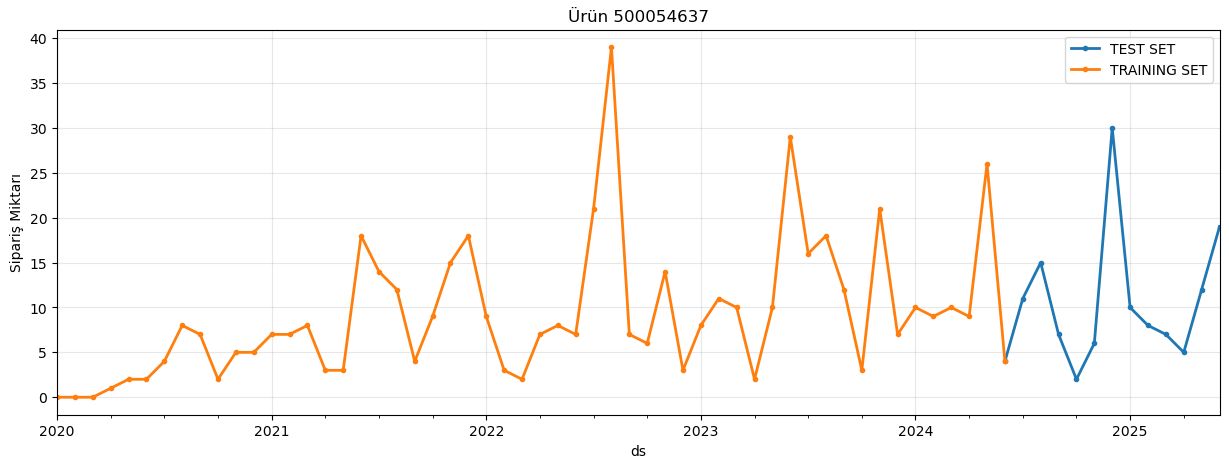

In [384]:
train_start = "2019-01-01"
train_end   = "2024-06-01"
test_start  = "2024-06-01"

# Train: 2021 - 2024 arası
train = df_monthly_yaygın.loc[
    (df_monthly_yaygın["ds"] >= train_start) & 
    (df_monthly_yaygın["ds"] <= train_end)
].copy()

# Test: 2025 ve sonrası
test = df_monthly_yaygın.loc[df_monthly_yaygın["ds"] >= test_start].copy()


train["y"] = train["y"].fillna(0)
test["y"]  = test["y"].fillna(0)
ax = (
    test.set_index("ds").rename(columns={"y": "TEST SET"})
        .join(
            train.set_index("ds").rename(columns={"y": "TRAINING SET"}),
            how="outer"
        )
        .sort_index()
        .plot(figsize=(15,5), title=f"Ürün {urun_kodu}", style='.-', linewidth=2, markersize=6)
)
ax.set_ylabel("Sipariş Miktarı")
ax.grid(True, alpha=0.3)


In [362]:
from prophet import Prophet

m = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=False,   # multiplicative
    weekly_seasonality=False,
    daily_seasonality=False
)

# Yıllık sezonsallık
m.add_seasonality(name='yearly', period=365, fourier_order=3)





m.fit(train)



04:51:57 - cmdstanpy - INFO - Chain [1] start processing
04:51:57 - cmdstanpy - INFO - Chain [1] done processing


In [363]:
forecast = m.predict(test)
forecast["yhat"] = forecast["yhat"].clip(lower=0)



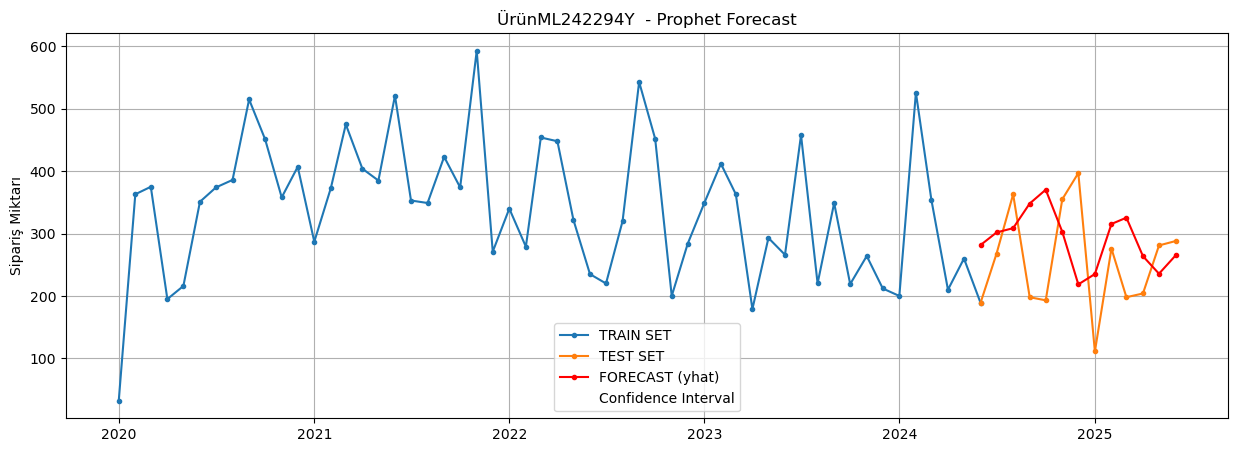

In [364]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(train["ds"], train["y"], ".-", label="TRAIN SET")
plt.plot(test["ds"], test["y"], ".-", label="TEST SET")
plt.plot(test["ds"], forecast["yhat"], "r.-", label="FORECAST (yhat)")  # tahmin
plt.fill_between(test["ds"], forecast["yhat_lower"], forecast["yhat_upper"], 
                 color="r", alpha=0.0, label="Confidence Interval")
plt.title(f"Ürün{urun_kodu}  - Prophet Forecast")
plt.ylabel("Sipariş Miktarı")
plt.legend()
plt.grid(True)
plt.show()

In [365]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Tahmin ile gerçekleri birleştir
merged = test.merge(forecast[["ds", "yhat"]], on="ds", how="inner")

# 0 olan gerçek değerleri çıkar
merged = merged[merged["y"] > 0]

# NumPy array'e çevir
y_true = merged["y"].values
y_pred = merged["yhat"].values

# Metrikler
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

def smape(y_true, y_pred):
    return 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)
    )

smape_val = smape(y_true, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"SMAPE: {smape_val:.2f}%")


MAE  : 89.08
RMSE : 103.99
MAPE : 42.14%
SMAPE: 34.18%


In [357]:

merged = (
    test[["ds","y"]]
    .merge(forecast[["ds","yhat"]], on="ds", how="inner")
    .dropna(subset=["y","yhat"])
)

# Aylık sapma yüzdesi (MAPE mantığı ama her gözlem için)
merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)

# Sonuçları görmek için
print(merged[["ds","y","yhat","sapma_%"]])

           ds     y       yhat     sapma_%
0  2024-06-01   4.0  19.412654  385.316354
1  2024-07-01  11.0  27.662615  151.478321
2  2024-08-01  15.0  25.732450   71.549667
3  2024-09-01   7.0  15.405209  120.074412
4  2024-10-01   2.0  11.363212  468.160612
5  2024-11-01   6.0  15.916752  165.279193
6  2024-12-01  30.0  17.449760  -41.834134
7  2025-01-01  10.0  12.284455   22.844552
8  2025-02-01   8.0   9.355678   16.945969
9  2025-03-01   7.0  11.277844   61.112061
10 2025-04-01   5.0  12.729023  154.580451
11 2025-05-01  12.0  14.254951   18.791261
12 2025-06-01  19.0  22.704076   19.495139
